In [70]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np


pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [32]:
data = pd.read_csv('pff_pi.csv', index_col = 0)

data = data.drop(columns=['SPEC', 'SPEC_opp'])

In [42]:
attributes = ['OVR', 'OFF', 'PASS', 'PBLK', 'RECV', 'RUN', 'RBLK', 'DEF', 'RDEF', 'TACK', 'PRSH', 'COV']
periods = [4,8,16]
lagged = pd.DataFrame()

for team in data['Team'].unique():
    
    team_data = data[data['Team'] == team]

    for attribute in attributes:

        
#         uncomment this for lags
#         for i in range(1,17):
#             col = attribute + '_lag' + str(i)
#             team_data[col] = team_data[attribute].shift(i)
            
        
        
#         creates a simple moving average(sma) and exponential moving average(ema) 
#         over the periods specified earlier

        for period in periods:
            team_data[(attribute + '_sma' + str(period))] = team_data[attribute].rolling(window = period).mean().shift(1)
            team_data[(attribute + '_ema' + str(period))] = team_data[attribute].ewm(span = period).mean().shift(1)
        
        lagged = lagged.append(team_data)
        

In [114]:
lagged = lagged.dropna().sort_values(by=['Team','gamenum'])
lagged

COV  COV_ema16   COV_ema4   COV_ema8  COV_opp  COV_sma16  COV_sma4  \
270   59.9  62.300630  60.599297  61.805642     89.2   62.89375    62.000   
280   55.9  61.980017  60.319531  61.376176     59.2   62.21875    61.600   
288   49.0  61.180723  58.551539  60.145900     63.2   61.81875    58.550   
313   63.8  59.601236  54.730691  57.647955     67.6   61.51875    54.800   
320   66.7  60.139226  58.358547  59.024108     58.6   60.80000    57.150   
...    ...        ...        ...        ...      ...        ...       ...   
3508  62.6  59.691410  58.809204  58.659914     57.2   59.07500    54.975   
3524  63.0  60.033597  60.325522  59.535489     82.8   59.53750    55.700   
3544  57.0  60.382586  61.395313  60.305380     40.4   59.97500    59.725   
3561  58.0  59.984635  59.637188  59.570851     50.5   58.58125    63.175   
3577  56.0  59.751148  58.982313  59.221773     88.9   59.01875    60.150   

      COV_sma8   DEF  DEF_ema16   DEF_ema4   DEF_ema8  DEF_opp  DEF_sma16  \
270    62.4000  57.1  62.932031  62.139531  62.767947     83.8   63.20000   
280    63.4125  56.6  62.153143  60.123377  61.490586     67.2   62.53750   
288    61.2750  54.7  61.423113  58.713883  60.391869     67.4   62.96250   
313    60.7125  76.3  60.551320  57.108232  59.116245     71.8   62.45000   
320    59.5750  70.5  62.569204  64.785220  62.960085     72.6   62.65625   
...        ...   ...        ...        ...        ...      ...        ...   
3508   60.2125  70.1  63.354416  62.467118  62.328970     49.9   62.57500   
3524   59.8375  56.7  64.148014  65.520271  64.055866     77.8   63.50625   
3544   61.7875  52.0  63.271777  61.992163  62.421229     41.9   63.23125   
3561   58.3500  52.4  61.945685  57.995298  60.105400     66.1   61.30000   
3577   57.5625  59.6  60.822664  55.757179  58.393089     77.3   60.69375   

      DEF_sma4  DEF_sma8        Date H/A   OFF  OFF_ema16   OFF_ema4  \
270     65.225   61.7250  2007-09-10   A  54.2  65.062849  68.797818   
280     63.200   62.5500  2007-09-16   H  74.3  63.612076  62.957702   
288     59.025   61.4625  2007-09-23   A  74.9  65.017137  67.495082   
313     55.875   61.4750  2007-09-30   H  66.8  66.298658  70.457230   
320     61.175   63.2000  2007-10-07   A  65.2  66.362895  68.994284   
...        ...       ...         ...  ..   ...        ...        ...   
3508    58.275   64.1625  2019-12-01   A  77.8  61.836523  64.305487   
3524    62.075   63.1625  2019-12-08   A  63.4  63.714579  69.703292   
3544    64.050   63.3250  2019-12-15   H  68.2  63.677570  67.181975   
3561    61.750   59.0625  2019-12-22   H  73.8  64.209621  67.589185   
3577    57.800   58.0375  2019-12-29   A  63.2  65.337901  70.073511   

       OFF_ema8  OFF_opp  OFF_sma16  OFF_sma4  OFF_sma8   OVR  OVR_ema16  \
270   66.707335     58.3   63.22500    66.975   66.7750  54.5  64.936562   
280   63.888609     75.9   62.07500    63.300   66.7875  68.2  63.542722   
288   66.227628     85.0   63.58750    68.175   66.5750  66.8  64.154979   
313   68.171222     54.0   64.14375    69.250   66.9125  73.1  64.497962   
320   67.864493     65.3   64.85000    67.550   67.2625  68.9  65.600144   
...         ...      ...        ...       ...       ...   ...        ...   
3508  62.868287     62.4   59.60625    65.200   61.0500  79.1  63.242720   
3524  66.186445     69.7   61.05625    66.900   65.0000  59.9  65.108282   
3544  65.567235     70.2   61.73125    67.975   66.5375  62.5  64.495543   
3561  66.152294     79.6   62.48750    68.725   66.4875  67.7  64.260774   
3577  67.851784     67.5   62.94375    70.800   68.0000  61.5  64.665388   

       OVR_ema4   OVR_ema8  OVR_opp  OVR_sma16  OVR_sma4  OVR_sma8  \
270   67.150690  66.007336     71.9   63.79375    67.550   65.4500   
280   62.089557  63.413975     74.6   62.66875    63.975   65.8875   
288   64.533983  64.489202     81.5   63.93125    65.125   65.2750   
313   65.440445  65.007083     61.6   64.00625    64.075   65.4500   
320   68.504379  66.817390   

In [30]:
lagged.sort_values(by='gamenum').dropna().to_csv('feature_df.csv')

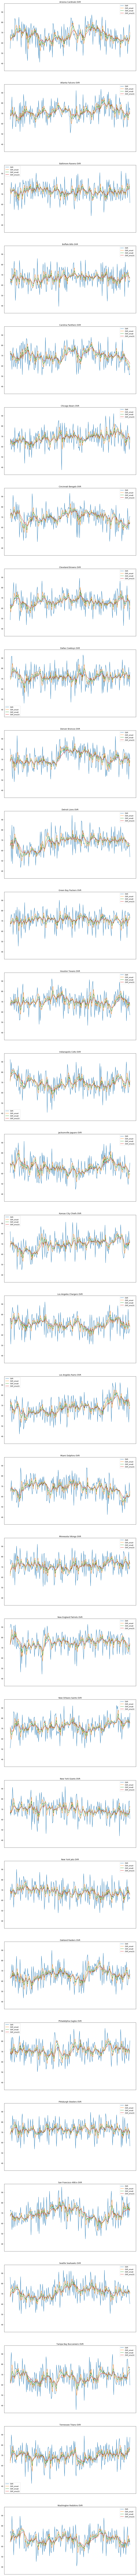

In [115]:
attribute = 'OVR'
fig, axs = plt.subplots(32, 1, figsize=(15,300), sharey=True)
# print(type(axs[0][0]))

for i, team in enumerate(lagged['Team'].sort_values().unique()):
    y = lagged[lagged['Team'] == team].Date
    
    cols = ['ema4','ema8','ema16']
    col_names = [attribute + '_' + col for col in cols]
    
#     add this to look at the actual values
    col_names.insert(0, attribute)
    
    
    
    for col in col_names:
        axs[i].plot(y, lagged[lagged['Team'] == team][col])
        
    axs[i].set_title(team + ' ' + attribute)
    axs[i].legend(col_names)
    axs[i].set_xticks([])
#     axs[i].xaxis.set_major_locator(plt.MaxNLocator(8, min_n_ticks = 13))
#     axs[i].set_xticklabels(['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
    
plt.show()
    